In [1]:
import pandas as pd
data=pd.read_csv('CoronaVirusTweets.csv',encoding='latin-1')
data.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,0,IN,"Bengaluru, India",city,821,357,NaN,2016-08-20T09:07:21Z,False,en
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"#Coronavirus: #WhiteHouse projects 100,000 to ...",Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Varanasi, India",city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,#Coronavirus | Three quasi-subspecies of virus...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Egmore Nungambakkam, India",city,341,1227,NaN,2009-07-30T14:34:33Z,False,en
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic #covid1...,Twitter for Android,NaN,NaN,NaN,True,...,3,IN,"Bidhan Nagar, India",city,8400,836,NaN,2009-08-20T11:33:48Z,False,en
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth #COVID19 positive case in Odisha \n\n29...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Orissa, India",city,8,81,NaN,2017-05-26T15:12:47Z,False,en


In [2]:
#Function to clean the tweets
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)  #For removing @mentions
    text=re.sub(r'#','',text)              #For removing # symbol
    text=re.sub(r'RT[\s]+','',text)        #For removing ReTweets
    text=re.sub(r'https?:\/\/\$+','',text) #For removing hyperlink
    return text

data['text']=data['text'].apply(cleanTxt)
data.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,0,IN,"Bengaluru, India",city,821,357,NaN,2016-08-20T09:07:21Z,False,en
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"Coronavirus: WhiteHouse projects 100,000 to 24...",Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Varanasi, India",city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,Coronavirus | Three quasi-subspecies of virus ...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Egmore Nungambakkam, India",city,341,1227,NaN,2009-07-30T14:34:33Z,False,en
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic covid19...,Twitter for Android,NaN,NaN,NaN,True,...,3,IN,"Bidhan Nagar, India",city,8400,836,NaN,2009-08-20T11:33:48Z,False,en
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth COVID19 positive case in Odisha \n\n29-...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Orissa, India",city,8,81,NaN,2017-05-26T15:12:47Z,False,en


In [3]:
#Sentence Tokenization
import nltk
from nltk.tokenize import sent_tokenize
for i in range(0,len(data)):
  tokenized_text=sent_tokenize(data['text'][i])
  print(tokenized_text)

['Online training for 25,000 doctors to begin https://t.co/nXDWo6iuxy via  digital platform for covid19 training']
['Coronavirus: WhiteHouse projects 100,000 to 240,000 deaths in the US" Coronavirus https://t.co/f9q7bU3pif \nUS COVID19 cases surpassed 175000 with more than 3400 fatalities.']
['Coronavirus | Three quasi-subspecies of virus in circulation in India, says ICMR: https://t.co/pI8he5dOKs']
['My small contribution for the pandemic covid19 to the PMCaresFund .', 'Will urge all to contribute for the noble case and give a helping hand to our lovable PM Narendra_Modi_ji  to fight with Corona .', 'https://t.co/euWbDz5cfC']
['Fourth COVID19 positive case in Odisha \n\n29-year-old male from Bhadrak district with travel history to Dubai tests positive for Coronavirus, informs Odisha Health &amp; Family Welfare department']
['IIT professors modify app to monitor people COVID19']
['From a doctor friend treating COVID19 patients.']
['NizamuddinMarkaz\nTill 31st March\nTotal Positive : 95

["The most curious question in my mind since the day 1 of lockdown is why  showcases his video message pan India on National TV channels being a Chief Minister of Delhi \n\nDoesn't he know anything else than publicity even in this crucial time of coronavirus"]
['Even Western nations are recognizing the importance of yoga.....  \n\nyoga onlineyoga meditation fitness gym pranayama stress lockdown coronavirus karma trump modi ivankatrump twitter yoganidra https://t.co/toAf42r0M1']
['The world outside home reminds me of all the zombie movies I ever watched.', "It's for good but It's kind of scary ????", 'COVID2019 lockdown Covid_19']
['Pahadi Amma seeking help from  .', 'She also spread awareness regarding CoronaVirus.', 'HimachalFightsCorona\nCoronaUpdatesInIndia \nCoronavirusOutbreakindia \nNarendermodi https://t.co/TO2E5DYLjE']
['publicDistribution is now superspreader huge lines no SocialDistancing,no lockdown      sir, pls request to do the needful before it\x83?', '?s too late.', 'co

['Tiger at  (US) tests positive for coronavirus.', 'This is the first confirmed case in a tiger anywhere in the world.', 'Via   \n(   ) https://t.co/tKcFVQgF5o']
['A NewYork Zoo Tiger has tested positive for CoronaVirus \n\nIt got it from its caregiver who is CoronaVirus positive.. \n\nCoronaVirus https://t.co/kqvgZ83J56']
['BJPat40 had burned the CoronaOutbreak last night by 9baje9mintues , now Modi should declare India free from Covid_19 and allow country to work normally.']
['Get Well Soon BorisJohnson\n \n\nStayHomeStaySafe BorisJohnsonCoronavirus']
['World now a days.. Covid_19 https://t.co/UTsQvORkYl']
['The biggest virus on earth is still human behavior.', 'lockdown\nCovid19 https://t.co/Q18bPxZMJQ']
['UK Prime Minister  has been moved to the intensive care\n\nCOVID19']
['Coronavirus | Municipalities using Smart Cities\x83??', 'command centres turn into war rooms: https://t.co/DSKWHkr0eS']
['Urban wildlife spotting during COVID19 lockdown: https://t.co/ApBL5ZMNCn']
['5 days ago 

['We are esteemed Training Partner (Eupraxis Expert Systems Consulting Pvt.', 'Ltd.) empanelled with UP Skill Development Mission (UPSDM) \n\n StayhomeStaysafe Indiafightscorona Waragainstcorona https://t.co/4nCzFEVUGC']
["StayHomeIndia StayHomeStaySafe swarabhaskar FridayThoughts COVID2019india my First meme for All of u.. don't move outside home unnecessarily https://t.co/NLoP8RqIry"]
['We are esteemed Training Partner (G K Foundation) empanelled with UP Skill Development Mission (UPSDM)\n \n StayhomeStaysafe Indiafightscorona Waragainstcorona https://t.co/tbDAoPAEAj']
['Number of Tweets related to CoronaVirus would have broken all records on tweeter in last couple of months.', '_gautam how can we find some stats on this ???', '?']
['It is no secret that the coronavirus mutated through various life forms.', 'We are gullible to think that there is an instant cure to this anomaly.', "There isn't one, atleast not in the near future.", 'Humans are the mode of transport for the virus.', '

["Hon'ble Cm  jee,  Humble Request to you Please Seal all Hotspot of Covid_19 Cases area instead of Lockdown in whole Bihar state."]
["Three days after odisha extended the lockdown till April 30, Hone'ble cm shri _Odisha on Saturday urged the center to continue with the ongoing nationwide shutdown till the end of the month to stem the surge in Covid_19 cases with greater efficacy.", 'OdishaFightsCorona https://t.co/1VnAqqfjZe']
['We are esteemed Training Partner (Eupraxis Expert Systems Consulting Pvt.', 'Ltd.) empanelled with UP Skill Development Mission (UPSDM) \n\n StayhomeStaysafe Indiafightscorona Waragainstcorona https://t.co/We6BBl2vGc']
[' This is exactly the situation in India right now\nLockdownWithoutPlan \nCoronavirusOutbreak']
['We are esteemed Training Partner (G K Foundation) empanelled with UP Skill Development Mission (UPSDM) \n\n StayhomeStaysafe Indiafightscorona Waragainstcorona https://t.co/4ZtYUuCwCF']
['Greetings to all on the occasion of the harvest festival, Ba

In [4]:
#Word Tokenization
from nltk.tokenize import word_tokenize
for i in range(0,len(data)):
    tokenized_word=word_tokenize(data['text'][i])
    print(tokenized_word)

['Online', 'training', 'for', '25,000', 'doctors', 'to', 'begin', 'https', ':', '//t.co/nXDWo6iuxy', 'via', 'digital', 'platform', 'for', 'covid19', 'training']
['Coronavirus', ':', 'WhiteHouse', 'projects', '100,000', 'to', '240,000', 'deaths', 'in', 'the', 'US', "''", 'Coronavirus', 'https', ':', '//t.co/f9q7bU3pif', 'US', 'COVID19', 'cases', 'surpassed', '175000', 'with', 'more', 'than', '3400', 'fatalities', '.']
['Coronavirus', '|', 'Three', 'quasi-subspecies', 'of', 'virus', 'in', 'circulation', 'in', 'India', ',', 'says', 'ICMR', ':', 'https', ':', '//t.co/pI8he5dOKs']
['My', 'small', 'contribution', 'for', 'the', 'pandemic', 'covid19', 'to', 'the', 'PMCaresFund', '.', 'Will', 'urge', 'all', 'to', 'contribute', 'for', 'the', 'noble', 'case', 'and', 'give', 'a', 'helping', 'hand', 'to', 'our', 'lovable', 'PM', 'Narendra_Modi_ji', 'to', 'fight', 'with', 'Corona', '.', 'https', ':', '//t.co/euWbDz5cfC']
['Fourth', 'COVID19', 'positive', 'case', 'in', 'Odisha', '29-year-old', 'male'

['Keep', 'your', '``', 'thinking', "''", 'so', 'high', 'that', 'no', 'one', 'can', 'even', '``', 'think', "''", 'of', 'thinking', 'like', 'you', '.', 'nCorona', 'COVID19', '@', 'Bangalore', ',', 'India', 'https', ':', '//t.co/bs3WfE6KC4']
['Former', 'hazuri', 'raagi', 'of', 'goldentemple', 'padmashri', 'award', 'winner', 'sardar', 'passes', 'away', 'after', 'being', 'found', 'positive', 'of', 'COVID19', '.', 'He', 'came', 'back', 'to', 'India', 'in', 'feb', 'from', 'abroad', 'n', 'also', 'went', 'to', 'various', 'places', 'in', 'India', 'for', 'keertan', '..God', 'bless', 'his', 'pious', 'soul..']
['will', 'beer', 'brand', 'change', 'it', "'s", 'name', '?', 'coronabeer', 'justwondering', 'coronavirus']
['Day', '9', ':', 'Scary', 'trend', 'of', 'rise', 'in', 'cases', 'of', 'COVID19', 'being', 'observed', 'in', 'Maharashtra', ',', 'Kerala', ',', 'TN', 'ans', 'Delhi', 'as', 'cases', 'mount', 'to', '2000', 'and', 'above', '.', 'What', 'is', 'one', 'state', 'doing', 'wrong', 'or', 'the', 'o

['If', 'this', 'video', 'does', "n't", 'make', 'you', 'realise', 'your', 'privileges', 'and', 'ask', 'your', 'government', 'the', 'right', 'questions', 'about', 'COVID19', 'Lockdown', 'Disability', 'Women', 'Children', 'and', 'much', 'more', ',', 'nothing', 'else', 'will', 'via', 'CoronavirusOutbreakindia', 'https', ':', '//t.co/70F60CkUHI']
['So', ',', 'stay', 'home', ',', 'stop', 'complaining', ',', 'and', 'stay', 'safe', '.', 'This', 'too', 'shall', 'pass', '!', 'Covid19', 'Coronavirus', 'CoronavirusPandemic', 'CoronavirusOutbreak', 'StayHomeStaySafe', 'Learning', 'Ramayan', 'Trending', 'Lockdown21']
['Please', 'switch', 'off', 'your', 'lights', 'at', 'homes', 'on', 'Sunday', ',', 'light', 'up', 'candles', ',', 'torch', 'or', 'mobile', 'flashlights', 'on', 'your', 'balconies', 'for', '9', 'minutes', '09PM9Min', '5thApril2020CaronaWarriorsDay', 'IndiaFightsCorona', 'COVID19', 'https', ':', '//t.co/yfHIGtPizY']
['Distribution', 'of', 'Food', 'materials', 'to', 'needy', 'people', 'amid

['You', 'are', 'doing', 'a', 'great', 'job', '!', '!', 'So', 'happy', 'for', 'all', 'your', 'services', 'during', 'the', 'lockdown', 'period', '.', 'Haven\x83', '?', '?', 't', 'stepped', 'out', 'of', 'home', 'due', 'to', 'your', 'uninterrupted', 'daily', 'supply', 'of', 'Milk', 'and', 'other', 'stuff', '.', 'Lockdown21', 'IndiaFightsCorona', 'Covid19']
['But', 'is', 'best', 'CM', 'Maharashtra', 'has', 'ever', 'seen', '...', 'Period..', 'coronavirus', 'https', ':', '//t.co/yN2JyZ8uA0']
['You', 'are', 'doing', 'a', 'great', 'job', '!', '!', 'So', 'happy', 'for', 'all', 'your', 'services', 'during', 'the', 'lockdown', 'period', '.', 'Haven\x83', '?', '?', 't', 'stepped', 'out', 'of', 'home', 'due', 'to', 'your', 'uninterrupted', 'daily', 'supply', 'of', 'Milk', 'and', 'other', 'stuff', '.', 'Lockdown21', 'IndiaFightsCorona', 'Covid19', '_misra']
['ODISHA', 'COMPLETES', '21', 'DAYs', 'of', 'MIXED', "LOCKDOWN's", 'I', 'thank', '_Odisha', 'or', '_Odisha', 'for', 'being', 'the', '1st', 'CM', 

['Prophet', 'Muhammad', '?', 'ÿ', '(', '\x8bú§', ')', 'said', ':', 'Knowledge', 'from', 'which', 'no', 'benefit', 'is', 'derived', 'is', 'like', 'a', 'treasure', 'out', 'of', 'which', 'nothing', 'is', 'spent', 'in', 'the', 'cause', 'of', 'God', '.', '``', 'Stay', '&', 'amp', ';', 'Study', '@', 'Home', "''", 'Online', 'Class', 'for', 'SSF', 'Workers', 'Day', '08', 'Class', 'by', ':', 'Usthad', 'Hafiz', 'Sufiyan', 'Saquafi', ',', 'Kavalkatte', 'Covid_19', 'StayHomeStaySafe', 'https', ':', '//t.co/TdZDzIIT5O']
['Covid', '19', ':', 'IPR', 'Minister', 'Makes', 'Visit', 'To', 'Rangpo', 'covid19', 'coronavirus', 'https', ':', '//t.co/Etr1ByuvMr']
['This', 'is', 'no', 'time', 'for', 'statements', 'around', 'political', 'or', 'religious', 'groupings', '.', 'It', 'is', 'time', 'to', 'contain', 'the', 'spread', 'of', 'Coronavirus', 'Each', 'one', 'has', 'a', 'role', 'to', 'play', 'and', 'the', 'government', "'s", 'role', 'is', 'to', 'provide', 'medical', 'aid', 'and', 'get', 'money', 'for', 'supp

['12,469', 'Americans', 'died', 'over', 'the', 'course', 'of', '1', 'year', 'during', 'the', 'H1N1', 'flu', 'pandemic', 'in', '2009', '.', 'In', 'just', 'over', '5', 'weeks', ',', 'coronavirus', 'has', 'been', 'linked', 'to', 'nearly', '13,000', 'deaths', 'in', 'the', 'U.S.', 'COVID19', 'https', ':', '//t.co/cFVQJqfxQi']
['Top', 'COVID19', 'recoveries', 'worldwide', ':', '?', '?', '?', '?', '?', '?', '?', '?', '-', 'China', 'has', 'recorded', '77,167', 'recoveries', 'out', 'of', '81,740', 'total', 'cases', '.', 'Percentage', ':', '94.40', '%', 'COVID2019']
['Top', 'COVID19', 'recoveries', 'worldwide', ':', '?', '?', '?', '¦', '?', '?', '?', '?', '-', 'Spain', 'has', '43,208', 'recoveries', 'out', 'of', '141,942', 'total', 'cases', '.', 'Percentage', ':', '30.44', '%', 'corana']
['Top', 'COVID19', 'stats', 'regarding', 'the', 'new', 'deaths', ':', '?', '?', '?', '§', '?', '?', '?', '?', '-', 'USA', 'recorded', '+1,924', 'new', 'deaths', ',', 'raising', 'their', 'total', 'to', '12,795', 

['COVID19', 'coronavirus', 'With', 'normal', 'health', 'expenditure', 'we', 'are', 'fighting', 'with', 'Corona', '.', 'CoronaLockdown', 'https', ':', '//t.co/ec81T4RKnf']
['A', '``', 'Thank', 'you', "''", 'to', 'all', 'those', 'who', 'are', 'working', 'tirelessly', 'for', 'us', 'in', 'this', 'crisis', 'time.', '?', '?', '?', '\x8f', 'ThankYou', '21daylockdown', 'coronavirus', 'StayHomeSaveLives', 'https', ':', '//t.co/89SWtZWWnT']
['Amazing', 'to', 'see', 'come', 'forward', 'to', 'supports', 'the', 'painter', 'community', '.', 'With', 'the', 'Amudha', 'Surabi', 'card', ',', 'painters', 'and', 'their', 'families', 'can', 'buy', 'the', 'groceries', 'they', 'need', 'during', 'this', 'pandemic', '.', 'COVID19', 'NipponPaint', 'StayHomeStaySafe', 'https', ':', '//t.co/tZNchcS76g']
['_rajeswari', 'Rema', ',', 'you', 'should', 'develop', 'a', 'toolkit', 'for', 'how', 'to', 'govern', 'a', 'dostrict', 'at', 'the', 'time', 'of', 'COVID19', 'specially', 'from', 'citizens', 'perspective', '.', 'Th

['IndiaFightsCorona', ':', 'Practise', 'frequent', 'hand-washing', 'with', 'soap', 'and', 'water', 'or', 'use', 'an', 'alcohol-based', 'hand', 'sanitizer', '.', 'Let', 'us', 'fight', 'COVID19', 'together', '.', 'Share', 'this', 'information', 'and', 'help', 'us', 'to', 'help', 'you', '.', 'Lockdown21', 'CoronaOutbreak', 'SwasthaBharat', 'HealthForAll', 'https', ':', '//t.co/KU7xfEHqZE']
['Maintaining', 'Social_Distance', 'but', 'close', 'to', 'my', 'plants', '.', 'Covid_19', 'Every', 'living', 'matters', '.', 'reuse', 'kullhad', 'snakeplant', 'greenlife', 'Believe', 'enjoylife', 'positivity', 'happiness', 'myownworld', 'https', ':', '//t.co/ZfLOdWzVFI']
['Send', 'all', 'Covid19', 'suspects', 'to', 'islands', 'like', 'Andaman', 'or', 'Lakshadweep', 'to', 'quarantine', '...', 'Hard', 'decisions', 'are', 'sometimes', 'required', 'to', 'save', 'huge', 'population']
['Things', 'we', 'ca', "n't", 'see', 'affect', 'our', 'lives', 'much', 'more', 'than', 'what', 'we', 'think', '.', 'ronakgajja

['Greetings', 'to', 'all', 'on', 'the', 'occasion', 'of', 'the', 'harvest', 'festival', ',', 'Baisakhi', '!', 'May', 'this', 'festival', 'usher', 'in', 'good', 'health', ',', 'happiness', 'and', 'prosperity', 'to', 'all', '!', 'Baisakhi2020', 'StayHomeStaySafe', 'StayHomeIndia', 'https', ':', '//t.co/JkGefdXvVj']
['Wishing', 'all', 'a', 'very', 'happy', 'and', 'prosperous', 'MahaBishubaSankranti', 'and', 'OdiaNewYear', '.', 'May', 'this', 'new', 'year', 'bring', 'new', 'hope', 'in', 'your', 'life', '.', 'Jai', 'Jagannath', '?', '?', '?', '\x8f', 'StayHomeStaySafe', 'https', ':', '//t.co/GpFDNSjLgm']
['The', '``', 'positive', "''", 'notes', 'on', 'CoronaVirus', ':', '-', 'which', 'bonds', 'the', 'missing', 'link', 'of', 'RuralIndia', '.', '-', 'complete', 'stop', 'on', 'alcohol', 'consumption', '.', '-', 'Agriculture', 'lands', 'are', 'now', 'getting', 'clean', '.', '-', 'Family', 'conflicts', 'resolved', ',', 'now', 'they', 'know', 'd', 'value', 'of', 'relationship', '.', 'Source', ':'

['So', 'much', 'pain', 'we', 'have', 'given', 'for', 'our', 'amusement', 'and', 'taste', 'of', 'tounge', '.', 'I', 'do', "n't", 'give', 'a', 'damn', 'about', 'human', 'race', 'if', 'they', 'are', 'dying', '.', 'I', 'do', "n't", 'give', 'a', 'damn', 'about', 'myself', 'too', '.', 'covid19', 'coronavirus', 'MotherNature']
['NewProfilePic', 'HappyTamilNewYear', 'BeHappy', 'StayHomeStaySafe', 'kavin', 'losliya', 'kaviliya', 'families', '_Fg1', '_0', '_02', 'https', ':', '//t.co/TVHNCEfcGz']
['Animals', 'are', 'better', 'than', 'a', 'certain', 'community', 'who', 'don\x83', '?', '?', 't', 'know', 'how', 'to', 'Maintain', 'social', 'distance', 'coronavirus', 'https', ':', '//t.co/mjER0tXDqs']
['soon', 'to', 'address', 'the', 'nation', 'in', 'view', 'of', 'Covid_19', '.', 'What', 'will', 'be', 'the', 'roadmap', 'ahead', '?', 'If', 'Lockdown2', 'will', 'have', 'relaxed', 'guidelines', '?', 'Waiting', 'for', 'PM', "'s", 'address', 'now']
['Indias', 'total', 'number', 'of', 'Coronavirus', 'posit

In [5]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 41 samples and 50 outcomes>


In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
#Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

{'can', 'with', 'what', 'where', "mustn't", 'ain', 'him', "needn't", 'and', 'out', 'was', 't', "hadn't", 'aren', 'then', "shouldn't", "that'll", "you'd", 'do', 'or', 'for', 'up', 'isn', 'a', 'mightn', 'some', 'off', "you've", 'theirs', 'mustn', 'from', 'i', 'needn', 'just', 'by', 's', "doesn't", 'so', 'shouldn', 'about', 'at', 'all', 'than', 'while', 'couldn', 'ourselves', 'be', 'on', 'don', 'until', 'shan', 'ours', 'ma', 'under', "weren't", 'themselves', 'most', 'your', 'have', 'himself', 've', 'weren', 'again', 'me', 'they', 'against', 're', 'hadn', 'were', 'my', 'has', 'these', 'd', 'an', "should've", 'yourselves', "didn't", 'will', 'should', 'wasn', 'herself', 'as', 'whom', 'won', 'it', 'not', 'now', 'own', 'o', 'into', 'if', "won't", "don't", 'no', 'only', 'being', 'other', 'is', 'once', 'am', 'very', 'which', "isn't", 'before', "mightn't", 'yours', "shan't", 'why', "you're", 'but', 'those', 'through', 'this', 'both', 'of', 'hers', 'you', 'down', 'here', "you'll", 'her', "aren't",

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alokverma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Removing Stopwords
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']
Filterd Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']


In [9]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']
Stemmed Sentence: ['breaking: coronavirus positive cases across the globe cross two million (2,000,000).', 'till now more than 1,26,000 people have died due to the covid19 pandemic.', 'only good news is that more than 484,000 people have recovered from the infection as well.', 'stayhome https://t.co/awdscddl1b']


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alokverma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#Lexicon Normalization
#performing stemming and Lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
for i in range(0,len(data)):
  word=data['text'][i]
  print("Lemmatized Word:",lem.lemmatize(str(word),"v"))
  print("Stemmed Word:",stem.stem(str(word)))

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alokverma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Word: Online training for 25,000 doctors to begin https://t.co/nXDWo6iuxy via  digital platform for covid19 training
Stemmed Word: online training for 25,000 doctors to begin https://t.co/nxdwo6iuxy via  digital platform for covid19 train
Lemmatized Word: Coronavirus: WhiteHouse projects 100,000 to 240,000 deaths in the US" Coronavirus https://t.co/f9q7bU3pif 
US COVID19 cases surpassed 175000 with more than 3400 fatalities.  
  
    

Stemmed Word: coronavirus: whitehouse projects 100,000 to 240,000 deaths in the us" coronavirus https://t.co/f9q7bu3pif 
us covid19 cases surpassed 175000 with more than 3400 fatalities.  
  
    

Lemmatized Word: Coronavirus | Three quasi-subspecies of virus in circulation in India, says ICMR: https://t.co/pI8he5dOKs
Stemmed Word: coronavirus | three quasi-subspecies of virus in circulation in india, says icmr: https://t.co/pi8he5dok
Lemmatized Word: My small contribution for the pandemic covid19 to the PMCaresFund .
Will urge all to contrib

Lemmatized Word: 32 people were tested positive yesterday in Delhi out of which 29 people had attended Tablighi Jamaat event in Nizamuddin. A total of 700 possibly infected &amp; confirmed cases of COVID19 are in different hospitals in Delhi: Health Minister Satyendar Jain
Stemmed Word: 32 people were tested positive yesterday in delhi out of which 29 people had attended tablighi jamaat event in nizamuddin. a total of 700 possibly infected &amp; confirmed cases of covid19 are in different hospitals in delhi: health minister satyendar jain
Lemmatized Word: CoronaUpdates - 21 new Covid19 positive cases have been registered after 10PM last night, till today morning. Total cases are now 132 in Andhra Pradesh. APFightsCorona COVID19 https://t.co/1MISL5IUgc
Stemmed Word: coronaupdates - 21 new covid19 positive cases have been registered after 10pm last night, till today morning. total cases are now 132 in andhra pradesh. apfightscorona covid19 https://t.co/1misl5iugc
Lemmatized Word: Moron N

Stemmed Word: publicdistribution is now superspreader huge lines no socialdistancing,no lockdown      sir, pls request to do the needful before it??s too late. coronavirus https://t.co/xwkldsbv6g https://t.co/8ywq9zb1ck
Lemmatized Word: Putting aside political ideology, we must fight together against this pestilence covid19
Stemmed Word: putting aside political ideology, we must fight together against this pestilence covid19
Lemmatized Word: COVID19 cannot be fought unless we maintain SocialDistancing and StayAtHome: Renowned Tabla player  

IndiaFightsCorona https://t.co/7W6sytJEkl
Stemmed Word: covid19 cannot be fought unless we maintain socialdistancing and stayathome: renowned tabla player  

indiafightscorona https://t.co/7w6sytjekl
Lemmatized Word: STAY POSITIVE !! LET??S FIGHT CORONA COVID19 IndiaFightsCorona https://t.co/fkzCwBAUHG
Stemmed Word: stay positive !! let??s fight corona covid19 indiafightscorona https://t.co/fkzcwbauhg
Lemmatized Word:  Dear Advocate of _in Pleas

Lemmatized Word: All respond to PM ModiTheWorldLeader 's Unite to remove dark shadow of Covid_19 virus. Let??s spread light &amp; energy.
We shall  overcome all odds
COVID2019
CoronavirusPandemic
lockdown
LightForIndia
diyajalao
9MinutesForIndia
iSupportLampLighting
9PM9minute https://t.co/s1ADEoQxbH
Stemmed Word: all respond to pm moditheworldleader 's unite to remove dark shadow of covid_19 virus. let??s spread light &amp; energy.
we shall  overcome all odds
covid2019
coronaviruspandemic
lockdown
lightforindia
diyajalao
9minutesforindia
isupportlamplighting
9pm9minute https://t.co/s1adeoqxbh
Lemmatized Word:  Enjoying in my kitchen ???? cooking something special ???. 
StayHomeStaySafe MobiGyaanGiveaway 
Join in Friends ??????

  _man_14  _ _DiVa_ _  https://t.co/BMjG5Wb7vA
Stemmed Word:  enjoying in my kitchen ???? cooking something special ???. 
stayhomestaysafe mobigyaangiveaway 
join in friends ??????

  _man_14  _ _diva_ _  https://t.co/bmjg5wb7va
Lemmatized Word: Amazed 

Lemmatized Word: Italy donated PPE equipment to China; now China wants Italy to buy it back Covid_19 ChinaVirus19 PPEshortage  https://t.co/hM28OXwtfg
Stemmed Word: italy donated ppe equipment to china; now china wants italy to buy it back covid_19 chinavirus19 ppeshortage  https://t.co/hm28oxwtfg
Lemmatized Word: Covid_19 COVID19 EconomicCrisis economy - Role of selfhelpgroup in boosting rural production and consumption. My column in Economic Times. https://t.co/3l82k6jA8z
Stemmed Word: covid_19 covid19 economiccrisis economy - role of selfhelpgroup in boosting rural production and consumption. my column in economic times. https://t.co/3l82k6ja8z
Lemmatized Word: As doctors, we need to help our fraternity battle this disease. Let??s provide them the right gear to deal with this problem. 
Donate to your alma mater RDA fund, so that the residents can get proper PPE to treat these patients. 
Covid_19 PPEshortage COVIDwarriors
Stemmed Word: as doctors, we need to help our fraternity batt

Lemmatized Word: Wages of labourers, truckers and delivery staff ?? needed to load, transport and distribute essentialgoods ?? have also jumped by 25-30% in the last 15 days, a report says

COVID19 coronavirus 
https://t.co/C0y3CmN4lQ
Stemmed Word: wages of labourers, truckers and delivery staff ?? needed to load, transport and distribute essentialgoods ?? have also jumped by 25-30% in the last 15 days, a report says

covid19 coronavirus 
https://t.co/c0y3cmn4lq
Lemmatized Word: "Coronavirus: Trump announces hold on US funding for the WHO" Coronavirus https://t.co/AHCHJVSyqH
Soo.,
Here it is..
FightForTheTruth begins.
Chinese must be ready to face what so ever circumstances or consequences may be..
ChinaPlaysVictimCard
Stemmed Word: "coronavirus: trump announces hold on us funding for the who" coronavirus https://t.co/ahchjvsyqh
soo.,
here it is..
fightforthetruth begins.
chinese must be ready to face what so ever circumstances or consequences may be..
chinaplaysvictimcard
Lemmatiz

Stemmed Word: one person in 2750 dead with one in 120 cases ie out of 120 person's one is down with corona in new york city which is more than any country even spain or italy. 
newyorkcity covid19 
chinaliedandpeopledi
Lemmatized Word: StayHomeStaySafe 
... 
YouCanBeatCorona  Staying at Home is the Easiest &amp;  most Effective Way to Stay safe. https://t.co/hGq154w69K
Stemmed Word: stayhomestaysafe 
... 
youcanbeatcorona  staying at home is the easiest &amp;  most effective way to stay safe. https://t.co/hgq154w69k
Lemmatized Word: Wishing A Very Happy Birthday To One Of The Kindest Person I've Ever Seen . God Bless You With More Success, Happiness, Health, Wealth and Prosperity In Your Life. May His Blessings Shower On You In All Your Future Endeavours Dear . HappyBirthday
StayHomeStaySafe https://t.co/5fcn6npKsM
Stemmed Word: wishing a very happy birthday to one of the kindest person i've ever seen . god bless you with more success, happiness, health, wealth and prosperity in your l

Stemmed Word: 3 more coronavirus positive cases have been found in lucknow: dr sudhir singh, in-charge of isolation ward king george's medical university (kgmu)
Lemmatized Word: Rajasthan government bans photography during distribution of food packets and ration among the needy coronavirus
Stemmed Word: rajasthan government bans photography during distribution of food packets and ration among the needy coronaviru
Lemmatized Word: "There was never a night or a problem
That could defeat Sunrise or Hope" 

Bern. Williams..

HappyEaster
May your cup overflow with the light of Hope and Strength..! 
Have a Peaceful weekend. May God richly Bless all ??????
18DayOfLockedDown.
StayHomeStaySafe ??? https://t.co/teG7yn0na2
Stemmed Word: "there was never a night or a problem
that could defeat sunrise or hope" 

bern. williams..

happyeaster
may your cup overflow with the light of hope and strength..! 
have a peaceful weekend. may god richly bless all ??????
18dayoflockeddown.
stayhomestaysafe

Stemmed Word:  and so will the rate of domestic violence (dv) shoot up! since the lockdown the cases of child abuse and dv has increased. the last thing we require is labeling liquor as an essential commodity to help people be motivated to stayhomestaysaf
Lemmatized Word: Masks, even the ones you??ve made at home with your favourite bandanna or scarf, are effective in fighting Covid_19 only if they are worn properly

Dos and don??ts of wearing a mask

CautionYesPanicNo 
MaskIndia 
StayHomeIndia https://t.co/OeV5boYt1l
Stemmed Word: masks, even the ones you??ve made at home with your favourite bandanna or scarf, are effective in fighting covid_19 only if they are worn properly

dos and don??ts of wearing a mask

cautionyespanicno 
maskindia 
stayhomeindia https://t.co/oev5boyt1l
Lemmatized Word: Hon'ble Cm  jee,  Humble Request to you Please Seal all Hotspot of Covid_19 Cases area instead of Lockdown in whole Bihar state.
Stemmed Word: hon'ble cm  jee,  humble request to you please 

Stemmed Word: sikh volunteers are cooking almost 800 meals a day for australia's elderly and disabled during the covid19 coronavirus outbreak 
coronawarriors 
salute4servinghumanity 

https://t.co/lrahfcmuml
Lemmatized Word:  
Dear Sir,
???ø????? ?????? App downloaded and passed information to all relatives &amp; friends. 
We r always with you to fight against corona &amp; i am sure India will be the 1st country to win the battle against Covid-19.
Proud to be Indian.
StayHomeStaySafe
Stemmed Word:  
dear sir,
???ø????? ?????? app downloaded and passed information to all relatives &amp; friends. 
we r always with you to fight against corona &amp; i am sure india will be the 1st country to win the battle against covid-19.
proud to be indian.
stayhomestaysaf
Lemmatized Word:  Today, Google say: To all public transportation workers, thank you.
Watch about this doodle 
https://t.co/lxwd9tBNZH
This doodle was shown: 14.04.2020

COVID2019
Covid_19 GoogleDoodle Go

Lemmatized Word: Watch chef and Author  talk about his favorite masala and his journey. The Indian kitchen is incomplete without the masala dabba or the spice box that comprises a world of flavours, colours and textures. CoronavirusPandemic masaladabba receipe  https://t.co/V6qmNMXvbo
Stemmed Word: watch chef and author  talk about his favorite masala and his journey. the indian kitchen is incomplete without the masala dabba or the spice box that comprises a world of flavours, colours and textures. coronaviruspandemic masaladabba receipe  https://t.co/v6qmnmxvbo
Lemmatized Word: Is muscle pain a symptom of COVID-19? Just asking for an acquaintance. 
 _INDIA coronavirus IndiaFightCorona lockdown
Stemmed Word: is muscle pain a symptom of covid-19? just asking for an acquaintance. 
 _india coronavirus indiafightcorona lockdown
Lemmatized Word: Stay Fit wednesdaymorning WednesdayMotivation Lockdown2 CoronavirusPandemic StayHome _SG _official _SAI             https://t.co/T8QSpzJJB3
Stemmed

In [11]:
#Part-of-Speech(POS) tagging 
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokenized_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alokverma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('BREAKING', 'NN'),
 (':', ':'),
 ('CoronaVirus', 'NNP'),
 ('positive', 'JJ'),
 ('cases', 'NNS'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('globe', 'NN'),
 ('cross', 'NN'),
 ('two', 'CD'),
 ('million', 'CD'),
 ('(', '('),
 ('2,000,000', 'CD'),
 (')', ')'),
 ('.', '.'),
 ('Till', 'VB'),
 ('now', 'RB'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('1,26,000', 'CD'),
 ('people', 'NNS'),
 ('have', 'VBP'),
 ('died', 'VBN'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('COVID19', 'NNP'),
 ('pandemic', 'NN'),
 ('.', '.'),
 ('Only', 'RB'),
 ('good', 'JJ'),
 ('news', 'NN'),
 ('is', 'VBZ'),
 ('that', 'IN'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('484,000', 'CD'),
 ('people', 'NNS'),
 ('have', 'VBP'),
 ('recovered', 'VBN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('infection', 'NN'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('StayHome', 'NNP'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/awDscDdL1B', 'NN')]

In [12]:
#Feature Generation Using Bag of Words

df=pd.read_csv('data_after_analysis.csv',encoding='latin-1')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Analysis'] = labelencoder.fit_transform(df['Analysis'])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['text'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Analysis'], test_size=0.3, random_state=1)

In [15]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5733333333333334


In [22]:
#sentiment analysis
from textblob import TextBlob


In [23]:
#function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
data['subjectivity']=data['text'].apply(getSubjectivity)
data['polarity']=data['text'].apply(getPolarity)

#new dataframe
data


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,subjectivity,polarity
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,"Bengaluru, India",city,821,357,NaN,2016-08-20T09:07:21Z,False,en,0.000000,0.000000
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"Coronavirus: WhiteHouse projects 100,000 to 24...",Twitter for Android,NaN,NaN,NaN,False,...,"Varanasi, India",city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en,0.500000,0.500000
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,Coronavirus | Three quasi-subspecies of virus ...,Twitter for Android,NaN,NaN,NaN,False,...,"Egmore Nungambakkam, India",city,341,1227,NaN,2009-07-30T14:34:33Z,False,en,0.000000,0.000000
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic covid19...,Twitter for Android,NaN,NaN,NaN,True,...,"Bidhan Nagar, India",city,8400,836,NaN,2009-08-20T11:33:48Z,False,en,0.600000,0.283333
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth COVID19 positive case in Odisha \n\n29-...,Twitter for Android,NaN,NaN,NaN,False,...,"Orissa, India",city,8,81,NaN,2017-05-26T15:12:47Z,False,en,0.297727,0.113636
5,1.250000e+18,6.150244e+07,2020-04-01T00:33:45Z,sscsoftweb,IIT professors modify app to monitor people CO...,Twitter for Android,NaN,NaN,NaN,False,...,"Egmore Nungambakkam, India",city,342,1227,NaN,2009-07-30T14:34:33Z,False,en,0.000000,0.000000
6,1.250000e+18,3.637920e+08,2020-04-01T00:39:20Z,hrushikesh_kit,From a doctor friend treating COVID19 patients.,Twitter for Android,NaN,NaN,NaN,False,...,"Brahmapur, India",city,0,213,NaN,2011-08-28T18:04:26Z,False,en,0.000000,0.000000
7,1.250000e+18,3.369800e+08,2020-04-01T00:49:54Z,shashank_singh2,NizamuddinMarkaz\nTill 31st March\nTotal Posit...,Twitter for Android,NaN,NaN,NaN,False,...,"Noida, India",city,220,160,NaN,2011-07-17T07:19:13Z,True,en,0.681818,0.075758
8,1.250000e+18,1.318079e+08,2020-04-01T00:57:04Z,khizzy147,Panic mode. Is it here? \n coronavirus StaySaf...,Twitter for iPhone,NaN,NaN,NaN,False,...,"Rajendra Nagar, India",city,437,285,NaN,2010-04-11T11:38:14Z,False,en,0.000000,0.000000
9,1.250000e+18,1.050491e+08,2020-04-01T00:59:45Z,ravikathuria,Window is the best companion when you StayatHo...,Twitter for Android,NaN,NaN,NaN,True,...,"Ghaziabad, India",city,524,554,NaN,2010-01-15T05:42:34Z,False,en,0.337500,0.437500


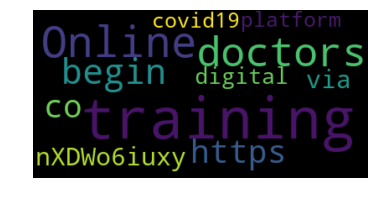

In [25]:
#plot the word cloud
from wordcloud import WordCloud
df = data.text[0]
wordcloud=WordCloud().generate(df)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

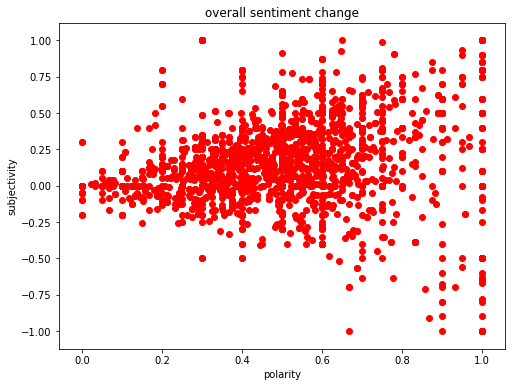

In [26]:
#plot polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
    plt.scatter(data['subjectivity'][i],data['polarity'][i], color='red' )
    plt.xlabel('polarity')
    plt.ylabel('subjectivity')
    
plt.title('overall sentiment change')
plt.show()

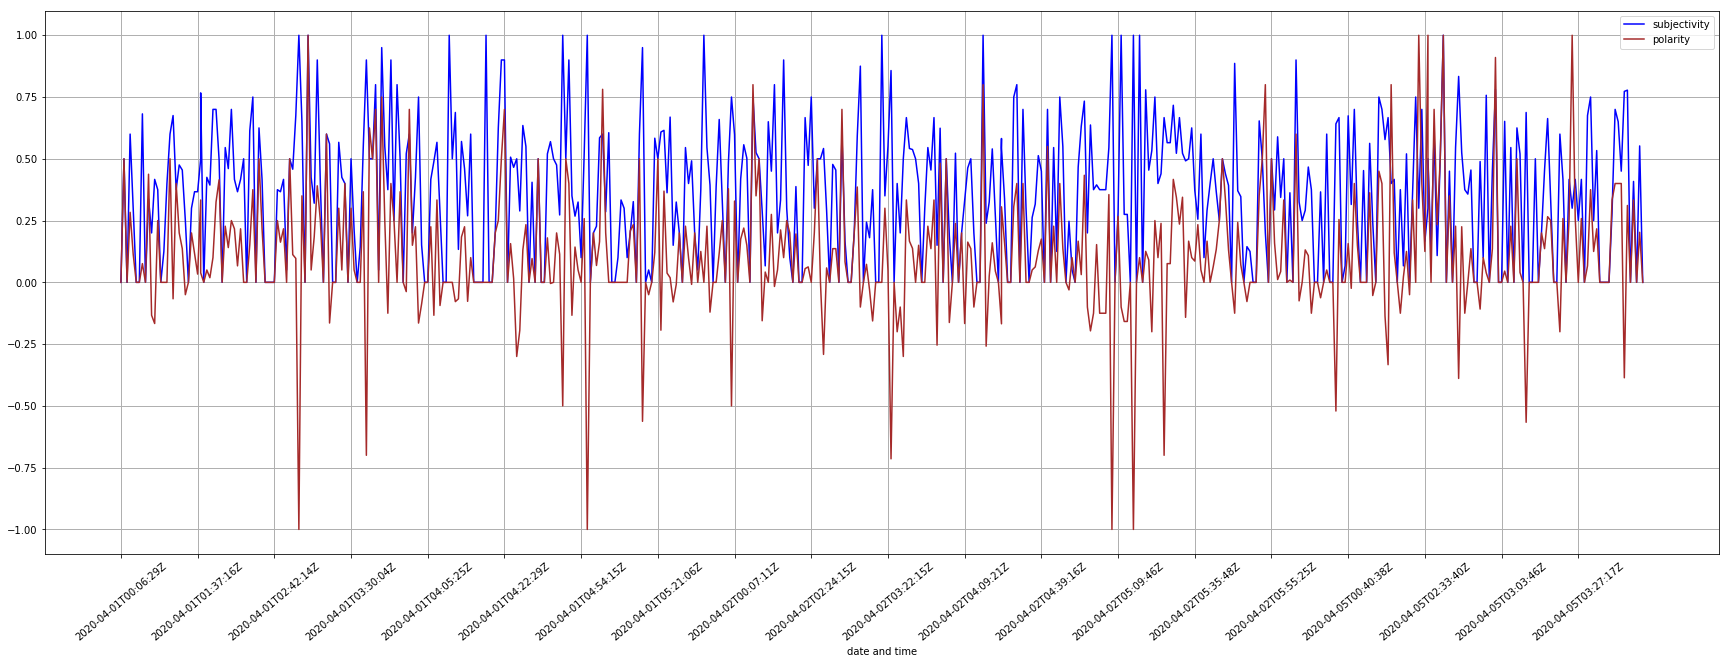

In [27]:
#plot polarity and subjectivity 
import numpy as np
from matplotlib import rcParams
data=data.iloc[0:500,0:24]
x=data.loc[:,"created_at"]
y=data.loc[:,"subjectivity"]
y1=data.loc[:,"polarity"]
rcParams['figure.figsize']=30,10
'''plt.figure(figsize=(20,6))'''
plt.xticks(rotation=40)
plt.xticks(np.arange(0,500,25))
'''plt.figure(figsize=(20,6))'''
plt.xlabel("date and time")
'''plt.figure(figsize=(20,6))'''


plt.grid(linewidth=1)
plt.plot(x,y,color="blue", label="subjectivity")
plt.plot(x,y1,color="brown",label="polarity")
plt.legend()
plt.show()


In [28]:
# Create a function to compute Confident, Fear, Analytical, Sad, Anger 
def getAnalysis(score):
 if score < 0 :
   return 'Fear'
 elif score == 0 :
   return 'Sad'
 elif score > 0 and score < 0.5 :
   return 'Anger'
 elif score > 0.4 and score < 0.9 :
   return 'Analytical'
 else:
   return 'confident'

#df['Analysis'] = df['Polarity'].apply(getAnalysis)
data['Analysis']=data['polarity'].apply(getAnalysis)

# Show the dataframe
data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,subjectivity,polarity,Analysis
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,city,821,357,NaN,2016-08-20T09:07:21Z,False,en,0.000000,0.000000,Sad
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"Coronavirus: WhiteHouse projects 100,000 to 24...",Twitter for Android,NaN,NaN,NaN,False,...,city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en,0.500000,0.500000,Analytical
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,Coronavirus | Three quasi-subspecies of virus ...,Twitter for Android,NaN,NaN,NaN,False,...,city,341,1227,NaN,2009-07-30T14:34:33Z,False,en,0.000000,0.000000,Sad
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic covid19...,Twitter for Android,NaN,NaN,NaN,True,...,city,8400,836,NaN,2009-08-20T11:33:48Z,False,en,0.600000,0.283333,Anger
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth COVID19 positive case in Odisha \n\n29-...,Twitter for Android,NaN,NaN,NaN,False,...,city,8,81,NaN,2017-05-26T15:12:47Z,False,en,0.297727,0.113636,Anger
5,1.250000e+18,6.150244e+07,2020-04-01T00:33:45Z,sscsoftweb,IIT professors modify app to monitor people CO...,Twitter for Android,NaN,NaN,NaN,False,...,city,342,1227,NaN,2009-07-30T14:34:33Z,False,en,0.000000,0.000000,Sad
6,1.250000e+18,3.637920e+08,2020-04-01T00:39:20Z,hrushikesh_kit,From a doctor friend treating COVID19 patients.,Twitter for Android,NaN,NaN,NaN,False,...,city,0,213,NaN,2011-08-28T18:04:26Z,False,en,0.000000,0.000000,Sad
7,1.250000e+18,3.369800e+08,2020-04-01T00:49:54Z,shashank_singh2,NizamuddinMarkaz\nTill 31st March\nTotal Posit...,Twitter for Android,NaN,NaN,NaN,False,...,city,220,160,NaN,2011-07-17T07:19:13Z,True,en,0.681818,0.075758,Anger
8,1.250000e+18,1.318079e+08,2020-04-01T00:57:04Z,khizzy147,Panic mode. Is it here? \n coronavirus StaySaf...,Twitter for iPhone,NaN,NaN,NaN,False,...,city,437,285,NaN,2010-04-11T11:38:14Z,False,en,0.000000,0.000000,Sad
9,1.250000e+18,1.050491e+08,2020-04-01T00:59:45Z,ravikathuria,Window is the best companion when you StayatHo...,Twitter for Android,NaN,NaN,NaN,True,...,city,524,554,NaN,2010-01-15T05:42:34Z,False,en,0.337500,0.437500,Anger


In [29]:
dl=pd.DataFrame(data)
dl['created_at']=pd.to_datetime(dl.created_at)
dl['account_created_at']=pd.to_datetime(dl.account_created_at)
dl.to_csv('data_after_analysis.csv',index=False)

In [30]:
# Print the percentage of Fear tweets
ptweets_fear = data[data.Analysis == 'Fear']
ptweets_fear = ptweets_fear['text']
ptweets_fear

round( (ptweets_fear.shape[0] / data.shape[0]) * 100 , 1)

15.8

In [31]:
# Print the percentage of sad tweets
ptweets_sad = data[data.Analysis == 'Sad']
ptweets_sad = ptweets_sad['text']
ptweets_sad

round( (ptweets_sad.shape[0] / data.shape[0]) * 100 , 1)

31.6

In [32]:
# Print the percentage of Anger tweets
ptweets_Anger = data[data.Analysis == 'Anger']
ptweets_Anger = ptweets_Anger['text']
ptweets_Anger

round( (ptweets_Anger.shape[0] / data.shape[0]) * 100 , 1)

44.6

In [33]:
# Print the percentage of Analytical tweets
ptweets_Analytical = data[data.Analysis == 'Analytical']
ptweets_Analytical = ptweets_Analytical['text']
ptweets_Analytical

round( (ptweets_Analytical.shape[0] / data.shape[0]) * 100 , 1)

6.8

In [34]:
# Print the percentage of confident tweets
ptweets_confident = data[data.Analysis == 'confident']
ptweets_confident = ptweets_confident['text']
ptweets_confident

round( (ptweets_confident.shape[0] / data.shape[0]) * 100 , 1)

1.2

In [35]:
# Show the value counts
data['Analysis'].value_counts()

Anger         223
Sad           158
Fear           79
Analytical     34
confident       6
Name: Analysis, dtype: int64

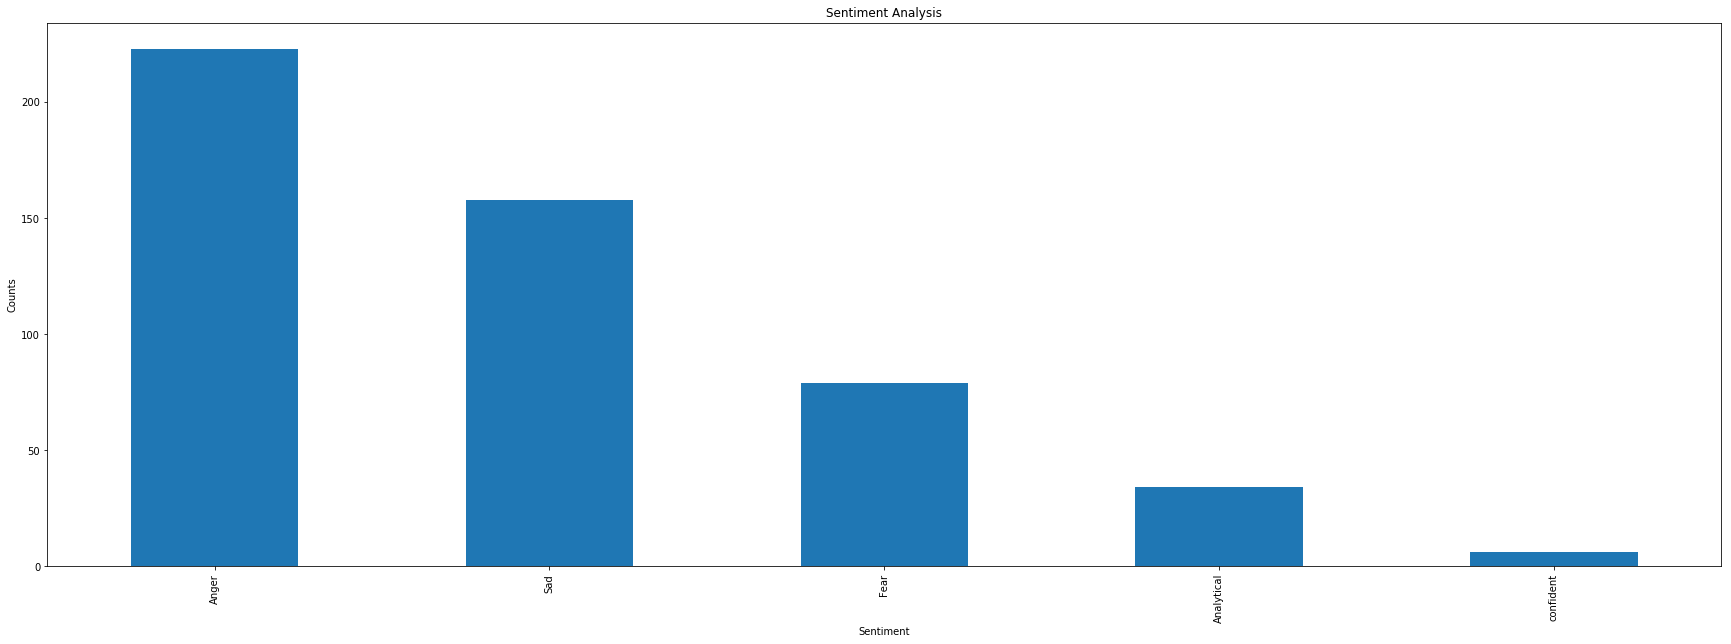

In [36]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

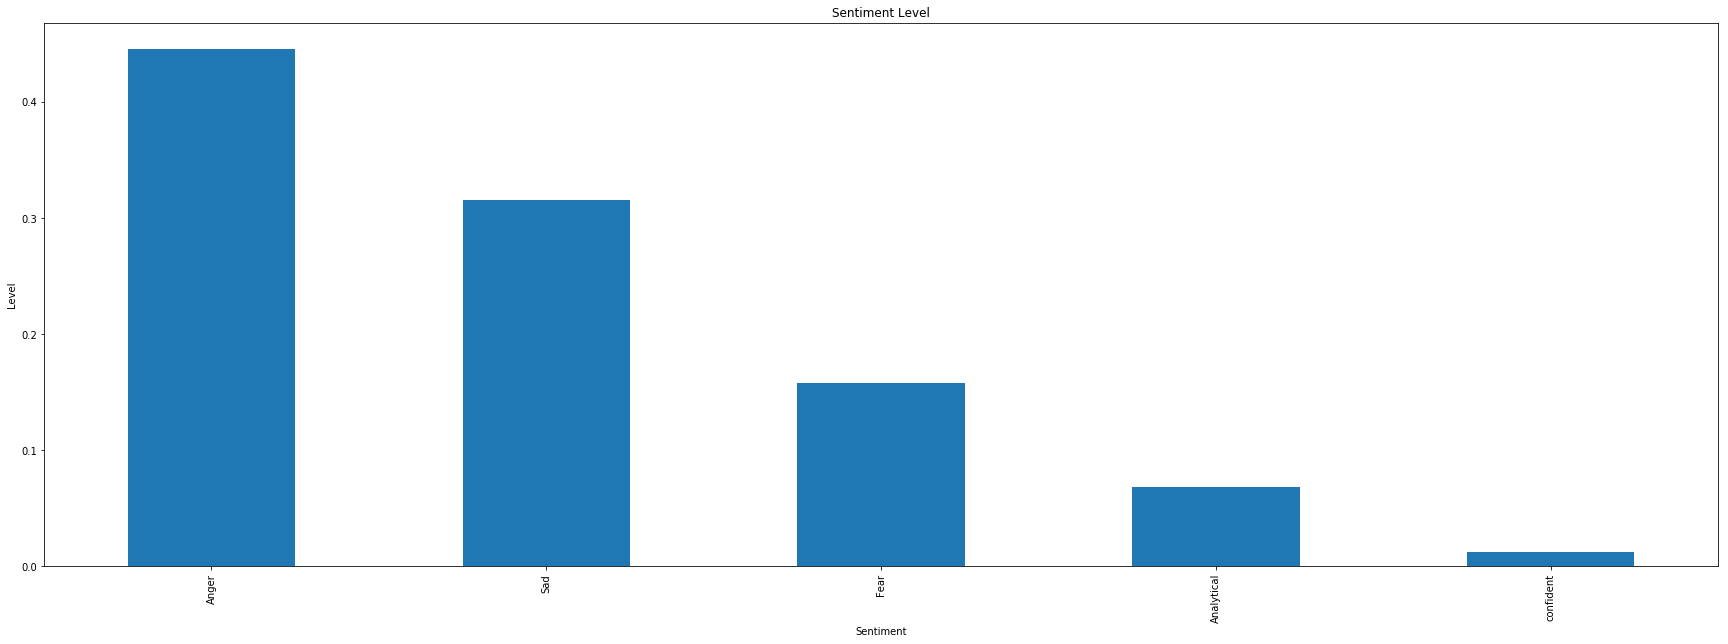

In [37]:
# Plotting sentiment level
plt.title('Sentiment Level')
plt.xlabel('Sentiment')
plt.ylabel('Level')
datan = data['Analysis'].value_counts()/500
datan.plot(kind = 'bar')

plt.show()

In [38]:
dffilter = dl.loc[(dl.loc[:, dl.dtypes != object] != 0).any(1)]

In [39]:
dffilter.describe()

,status_id,user_id,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,followers_count,friends_count,account_lang,subjectivity,polarity
count,5.000000e+02,5.000000e+02,6.200000e+01,9.900000e+01,500.000000,500.00000,500.000000,500.000000,0.0,500.000000,500.000000
mean,1.250000e+18,3.162160e+17,1.248871e+18,1.617576e+17,14478.742000,4.78800,9437.676000,789.296000,NaN,0.367210,0.105974
std,3.587589e+03,4.729215e+17,3.190580e+15,3.763318e+17,40986.011418,46.15226,57177.530616,1238.179547,NaN,0.280003,0.257330
min,1.250000e+18,7.498702e+06,1.240000e+18,1.415915e+07,0.000000,0.00000,0.000000,0.000000,NaN,0.000000,-1.000000
25%,1.250000e+18,1.345604e+08,1.250000e+18,7.590245e+07,332.250000,0.00000,72.750000,119.750000,NaN,0.062500,0.000000
50%,1.250000e+18,1.302955e+09,1.250000e+18,4.295482e+08,1885.000000,0.00000,336.500000,333.500000,NaN,0.387500,0.040833
75%,1.250000e+18,8.352500e+17,1.250000e+18,2.734933e+09,7955.000000,1.00000,2133.000000,830.750000,NaN,0.550521,0.227273
max,1.250000e+18,1.250000e+18,1.250000e+18,1.240000e+18,294403.000000,950.00000,578221.000000,11055.000000,NaN,1.000000,1.000000


In [40]:
import seaborn as sns

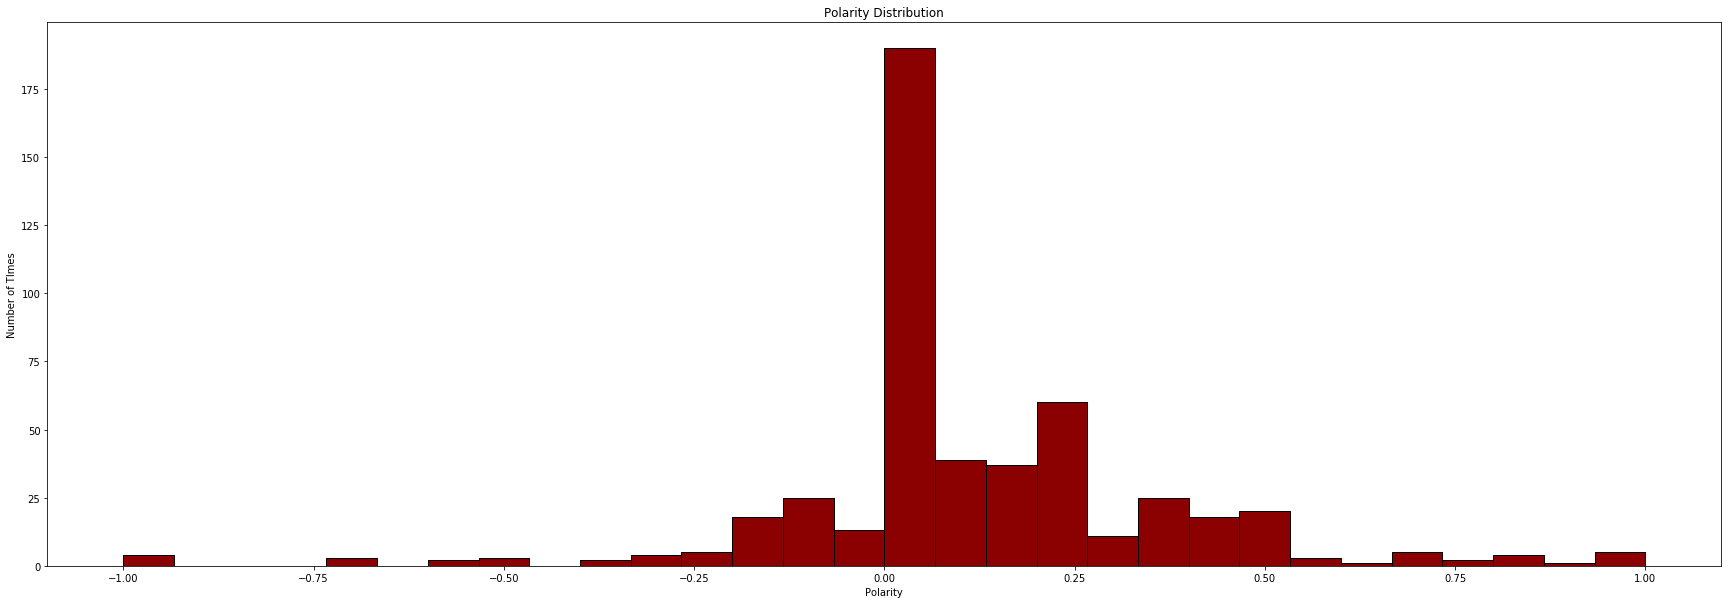

In [41]:
#Plotting polarity distribution
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

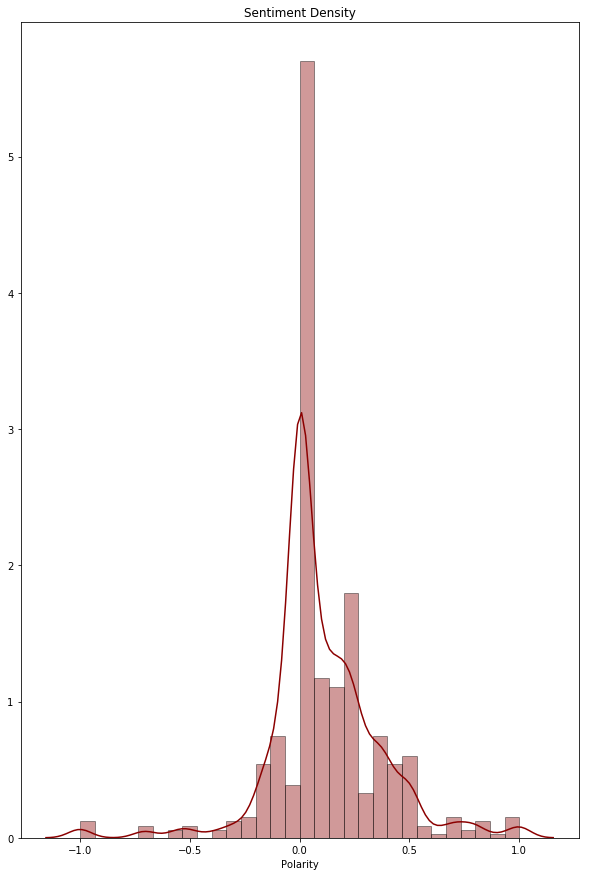

In [42]:
#Plotting Sentiment Density
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Sentiment Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15